In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# FOR TRAINING DATASET

Load the training dataset

In [2]:
data_train = pd.read_csv('./train.csv')
data_train.head(30)

,ID,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,state,ownerName
0,7972,A1,2016,10999,Manual,19865.0,Diesel,0,76.3,Medium,Used,Bart Williams
1,3391,A3,2017,18400,Manual,27672.0,Petrol,125,49.6,XLarge,Used,Bob Johnson
2,5599,A3,2016,15945,Semi-Auto,27306.0,Diesel,125,61.4,XLarge,Used,Bob Cyrus
3,6943,A3,2015,8490,Manual,40000.0,Diesel,20,68.9,XLarge,Used,Hamada Smith
4,3403,Q2,2018,17297,Manual,31433.0,Diesel,145,64.2,Medium,Used,Anna Williams
5,5197,Q3,2019,26900,Manual,8800.0,Petrol,145,39.8,Small,Used,Bart Marks
6,7176,A5,2015,14940,Automatic,46374.0,Diesel,125,58.9,XLarge,Used,Bob Harris
7,8354,Q5,2019,38490,Automatic,10200.0,Diesel,145,38.2,XLarge,Used,Ali Harris
8,4858,A3,2019,18700,Manual,11337.0,Diesel,150,55.4,XLarge,Used,Ali Johnson
9,862,Q3,2019,36497,Automatic,0.0,Diesel,145,47.1,XLarge,New,Max Williams


Get info about the dataset

In [3]:
print(data_train.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7438 entries, 0 to 7437
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7438 non-null   int64  
 1   model         7430 non-null   object 
 2   year          7438 non-null   int64  
 3   price         7438 non-null   int64  
 4   transmission  7438 non-null   object 
 5   mileage       7431 non-null   float64
 6   fuelType      7438 non-null   object 
 7   tax           7438 non-null   int64  
 8   mpg           7438 non-null   float64
 9   engineSize    7438 non-null   object 
 10  state         7428 non-null   object 
 11  ownerName     7438 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.0 MB
None


Lets look at `model`

In [4]:
data_train['model'].value_counts()

 A3     1498
 Q3     1139
 A4     1111
 A1     1057
 A5      708
 Q5      684
 Q2      639
 A6      591
 A1.       2
 A5.       1
Name: model, dtype: int64

There are 2 additional classes 'A5.' and 'A1.' that looks like they are a mistake, so we will rename them

In [5]:
data_train.loc[data_train['model'] == ' A1.', 'model'] = ' A1'
data_train.loc[data_train['model'] == ' A5.', 'model'] = ' A1'
data_train['model'].value_counts()

 A3    1498
 Q3    1139
 A4    1111
 A1    1060
 A5     708
 Q5     684
 Q2     639
 A6     591
Name: model, dtype: int64

look at the heatmap of the initial data (explained below in the second usage)

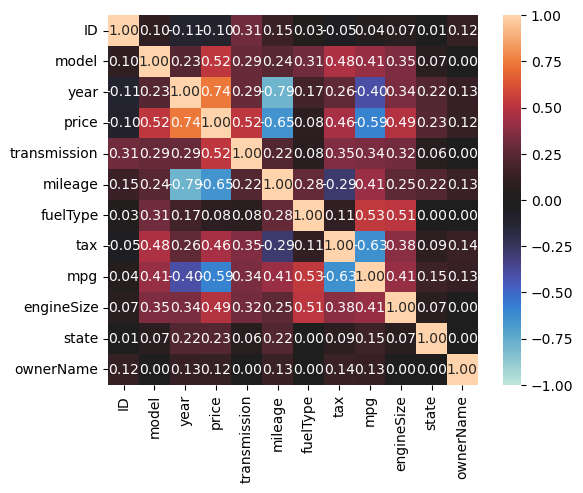

In [6]:
from dython.nominal import associations
ax = associations(data_train)

From the above heatmap of the correlations of the other variables with `price`, `ID`, `fuelType`, `ownerName` are not relevant in the process of building a model to predict the price

In [7]:
data_train.drop("ID", axis=1, inplace=True)
data_train.drop("ownerName", axis=1, inplace=True)
data_train.drop("fuelType", axis=1, inplace=True)
display(data_train)

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
0,A1,2016,10999,Manual,19865.0,0,76.3,Medium,Used
1,A3,2017,18400,Manual,27672.0,125,49.6,XLarge,Used
2,A3,2016,15945,Semi-Auto,27306.0,125,61.4,XLarge,Used
3,A3,2015,8490,Manual,40000.0,20,68.9,XLarge,Used
4,Q2,2018,17297,Manual,31433.0,145,64.2,Medium,Used
...,...,...,...,...,...,...,...,...,...
7433,A6,2016,14998,Semi-Auto,54813.0,30,64.2,XLarge,Used
7434,Q3,2017,21500,Semi-Auto,10239.0,165,50.4,XLarge,Used
7435,A1,2013,8998,Manual,53529.0,125,52.3,XSmall,Used
7436,A6,2015,14000,Automatic,114520.0,30,64.2,XLarge,Used


Check for NA entries

In [8]:
data_train.isna().sum()

model            8
year             0
price            0
transmission     0
mileage          7
tax              0
mpg              0
engineSize       0
state           10
dtype: int64

Looks like `model`, `mileage`, and `state` contains NaN values
Check if the dataset contains empty string, as they cannot be detected by `isna()`

In [9]:
print(np.any(data_train.values == ''))

False


To deal with NaN, we need to employ imploy data imputation techniques (i.e pick the mode to replace the NaN values in categorial data and pick mean, meadian or mode to replace the quantitative data)

for that we need to detect and deal with outliers first before utilizing data imputation techniques

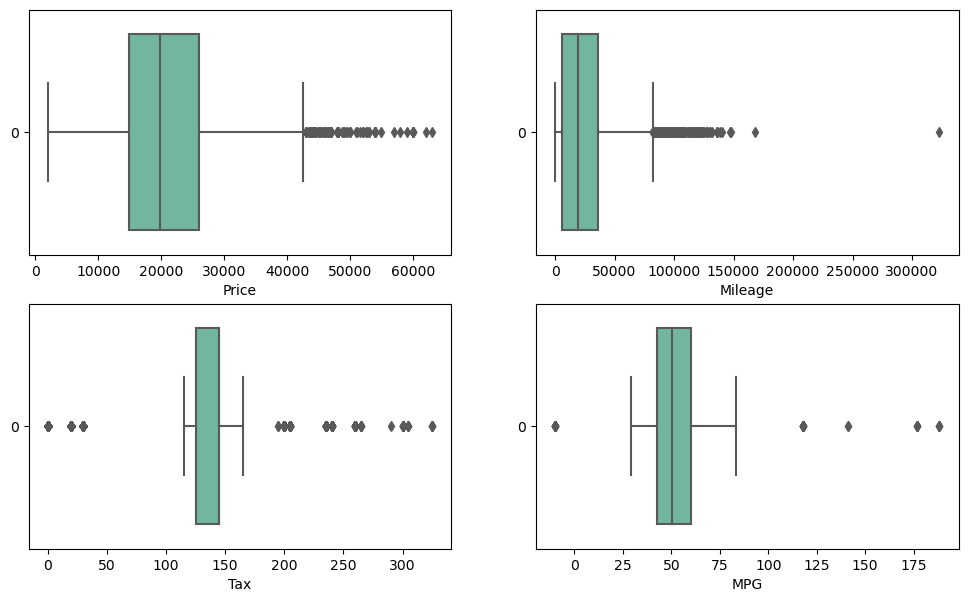

In [10]:
fig, axes = plt.subplots(2,2, figsize=(12,7))

axes[0,0].set_xlabel('Price')
sns.boxplot(data=data_train['price'], orient="h", palette="Set2", ax=axes[0,0])

axes[0,1].set_xlabel('Mileage')
sns.boxplot(data=data_train['mileage'], orient="h", palette="Set2", ax=axes[0,1])

axes[1,0].set_xlabel('Tax')
sns.boxplot(data=data_train['tax'], orient="h", palette="Set2", ax=axes[1,0])

axes[1,1].set_xlabel('MPG')
sns.boxplot(data=data_train['mpg'], orient="h", palette="Set2", ax=axes[1,1])

plt.show()


Since `price`, `mileage`, `tax` and `mpg` contains outliers, lets view their distribution

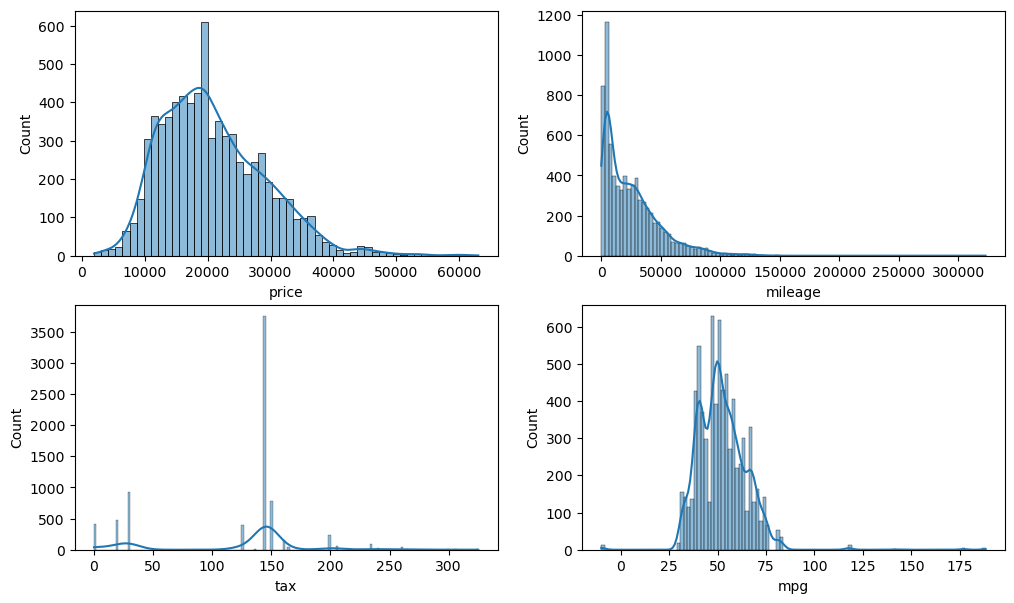

price skewness:		 0.7997
mileage skewness:	 1.6677
tax skewness:		-0.7006
mpg skewness:		 1.6147


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=False)

sns.histplot(data_train['price'], ax=axes[0,0], kde=True)

sns.histplot(data_train['mileage'], ax=axes[0,1], kde=True)

sns.histplot(data_train['tax'], ax=axes[1,0], kde=True)

sns.histplot(data_train['mpg'], ax=axes[1,1], kde=True)

plt.show()

print(f'price skewness:\t\t{data_train["price"].skew(): .4f}')
print(f'mileage skewness:\t{data_train["mileage"].skew(): .4f}')
print(f'tax skewness:\t\t{data_train["tax"].skew(): .4f}')
print(f'mpg skewness:\t\t{data_train["mpg"].skew(): .4f}')

lets investigate `tax` first

In [12]:
display(data_train['tax'].value_counts())

q1 = data_train['tax'].quantile(0.25)
q3 = data_train['tax'].quantile(0.75)
print(f'q1 = {q1}, q3 = {q3}')

145    3748
30      920
150     789
20      472
0       414
125     397
200     238
160     159
235      87
205      57
165      43
260      38
240      26
135      16
300      12
265       6
325       5
305       4
195       2
140       2
115       1
290       1
155       1
Name: tax, dtype: int64

q1 = 125.0, q3 = 145.0


`tax` values in the distribution is all over the place, so I will leave it for now

since `mpg` shows a distribution like `price` and `mileage`, we will handle it similarly but first we will check for the negative values displayed in the histogram

In [13]:
data_train[data_train['mpg'] < 0].shape
data_train[data_train['mpg'] < 0]

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
450,A3,2014,10750,Semi-Auto,56000.0,20,-10.0,Medium,Used
814,A5,2018,33500,Automatic,9102.0,145,-10.0,XXLarge,Used
2078,A3,2015,9899,Manual,57021.0,0,-10.0,Medium,Used
2199,Q3,2016,18000,Manual,23275.0,145,-10.0,XLarge,Used
2519,Q3,2017,15700,Semi-Auto,39585.0,150,-10.0,XSmall,Used
2580,A6,2016,16000,Automatic,47767.0,20,-10.0,XLarge,Used
2822,A4,2018,18450,Manual,15072.0,145,-10.0,XSmall,Used
2982,Q2,2020,26880,Manual,3524.0,145,-10.0,Small,Used
3994,A4,2015,15432,Semi-Auto,20385.0,125,-10.0,XLarge,Used
4527,Q3,2019,32990,Automatic,7118.0,145,-10.0,XLarge,Used


we will remove the negative rows now since they will be messing with way we handle the rest of the outliers (messing with log transformation)

In [14]:
data_train = data_train[data_train['mpg'] > 0]
data_train[data_train['mpg'] < 0].shape

(0, 9)

`price` shows moderate positive skewness, and `mileage` and `mpg` shows high positive skewness, so because of this I will use Tukey's method to detect outliers from [here](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755).

In [15]:
from copy import deepcopy
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_outer_fence = []
    outliers_inner_fence = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_outer_fence.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_inner_fence.append(index)
    return outliers_outer_fence, outliers_inner_fence

def modified_tukeys_method(df, variable):
    # log(variable + 1)
    log_variable = np.log(df[variable] + 1)
    df['variable_log'] = log_variable

    outliers_outer_fence, outliers_inner_fence = tukeys_method(df, 'variable_log')
    df.drop('variable_log', axis=1, inplace=True)
    return outliers_outer_fence, outliers_inner_fence

In [16]:
# get the index of the price outliers
outliers_outer_price, outliers_inner_price = tukeys_method(data_train, 'price')

# get the index of the mileage outliers
outliers_outer_mileage, outliers_inner_mileage = tukeys_method(data_train, 'mileage')

# get the index of the mpg outliers
outliers_outer_mpg, outliers_inner_mpg = tukeys_method(data_train, 'mpg')

For now we considered dealing with the outliers by **removing** them

In [17]:
inner_fence = np.unique(outliers_outer_price + outliers_outer_mileage + outliers_outer_mpg)

data_train_outliers = data_train.iloc[inner_fence]
print(data_train_outliers.shape)

(47, 9)


In [18]:
data_train_no_outliers = data_train.drop(data_train_outliers.index)

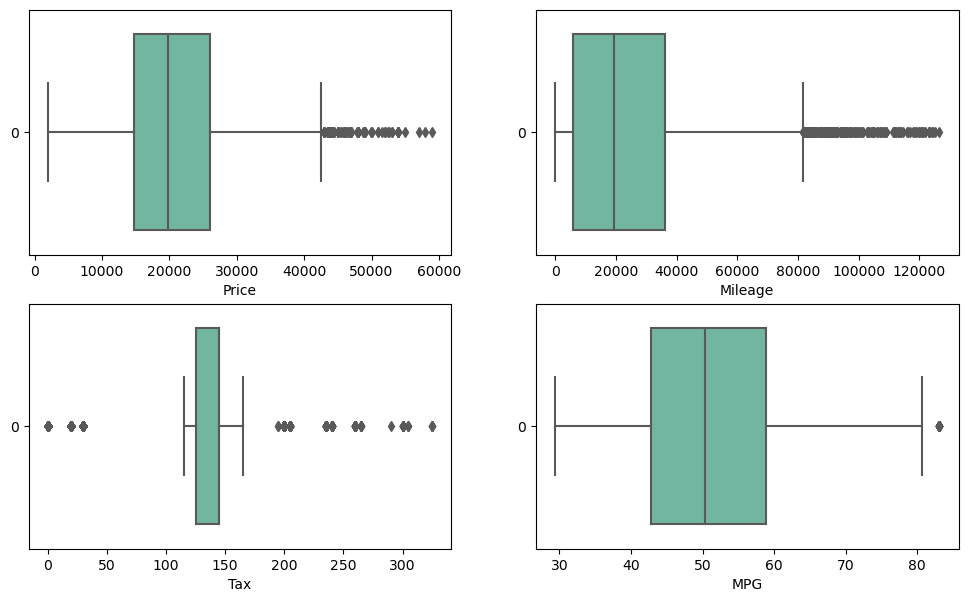

In [19]:
fig, axes = plt.subplots(2,2, figsize=(12,7))

axes[0,0].set_xlabel('Price')
sns.boxplot(data=data_train_no_outliers['price'], orient="h", palette="Set2", ax=axes[0,0])

axes[0,1].set_xlabel('Mileage')
sns.boxplot(data=data_train_no_outliers['mileage'], orient="h", palette="Set2", ax=axes[0,1])

axes[1,0].set_xlabel('Tax')
sns.boxplot(data=data_train_no_outliers['tax'], orient="h", palette="Set2", ax=axes[1,0])

axes[1,1].set_xlabel('MPG')
sns.boxplot(data=data_train_no_outliers['mpg'], orient="h", palette="Set2", ax=axes[1,1])

plt.show()


In [20]:
data_train_no_outliers = data_train.drop(data_train_outliers.index)

After dealing with the outliers, we then need to substitute the NA values inside the training data.
Lets view first the missing values

In [21]:
display(Markdown(f'<h5><center><strong>NAN model</strong></center></h5>'))
model_null = data_train_no_outliers.loc[data_train_no_outliers['model'].isna()]
display(model_null)

display(Markdown(f'<h5><center><strong>NAN mileage</strong></center></h5>'))
mileage_null = data_train_no_outliers.loc[data_train_no_outliers['mileage'].isna()]
display(mileage_null)

display(Markdown(f'<h5><center><strong>NAN State</strong></center></h5>'))
state_null = data_train_no_outliers.loc[data_train_no_outliers['state'].isna()]
display(state_null)

<h5><center><strong>NAN model</strong></center></h5>

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
200,NaN,2016,11990,Manual,14946.0,30,57.6,XSmall,Used
804,NaN,2018,16890,Manual,8768.0,150,51.4,XXSmall,Used
1281,NaN,2017,11000,Manual,34551.0,150,67.3,XXSmall,Used
1573,NaN,2016,9895,Manual,75189.0,0,80.7,Medium,Used
4466,NaN,2017,14995,Semi-Auto,10000.0,20,64.2,XXSmall,Used
5425,NaN,2015,13450,Semi-Auto,42214.0,30,58.9,XSmall,Used
6065,NaN,2015,12881,Manual,34188.0,30,55.4,XSmall,Used
7218,NaN,2019,17995,Manual,7150.0,150,49.6,XXSmall,Used


<h5><center><strong>NAN mileage</strong></center></h5>

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
20,A6,2019,29490,Semi-Auto,NaN,145,55.4,XXLarge,New
1113,A5,2019,27990,Semi-Auto,NaN,145,39.8,XLarge,New
3818,A3,2020,26500,Manual,NaN,145,52.3,Medium,New
4545,Q3,2020,28490,Manual,NaN,145,39.8,Small,New
5250,A1,2019,24490,Semi-Auto,NaN,145,44.1,XXSmall,New
6921,A5,2019,28991,Automatic,NaN,145,40.4,XLarge,NaN
6960,A3,2020,29000,Semi-Auto,NaN,145,50.4,XLarge,NaN


<h5><center><strong>NAN State</strong></center></h5>

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
596,A1,2018,14500,Automatic,50230.0,145,55.4,XSmall,NaN
1576,A4,2014,11391,Manual,73206.0,125,60.1,XLarge,NaN
1711,A3,2017,17950,Manual,9088.0,145,60.1,XSmall,NaN
1965,A3,2015,9216,Manual,63769.0,20,68.9,XLarge,NaN
2983,A4,2016,10990,Manual,57395.0,125,53.3,XSmall,NaN
4561,A1,2019,25888,Semi-Auto,0.0,145,40.4,XLarge,NaN
5313,A1,2016,11995,Manual,38502.0,30,57.6,XSmall,NaN
6546,Q2,2020,33000,Semi-Auto,0.0,145,32.5,XLarge,NaN
6921,A5,2019,28991,Automatic,NaN,145,40.4,XLarge,NaN
6960,A3,2020,29000,Semi-Auto,NaN,145,50.4,XLarge,NaN


Lets concentrate first in the `mileage`, normally we would utilize median imputation to deal with the missing values in `mileage` since the distribution is somewhat right skewed.

But from the first impression we had from the first 30 rows of the dataset, we will notice that the new cars always have zero milieage, lets verify this hypothesis

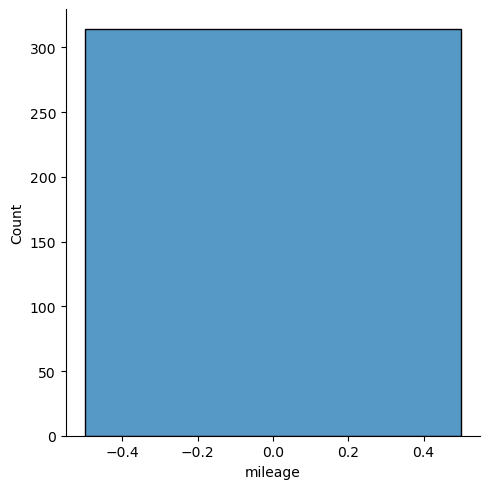

In [22]:
data_train_new_cars = data_train_no_outliers[data_train_no_outliers['state'] == 'New']
sns.displot(data=data_train_new_cars['mileage'])
plt.show()

from these we can safely assume that all new cars have 0 Km `mileage`, and the Na cars will have a value equals the median of the mileage

In [23]:
# get the list of the Na mileage values
mileage_null_index = data_train_no_outliers.loc[data_train_no_outliers['mileage'].isna()].index.to_list()

# get the median of the old mileage values
mileage_median = data_train_no_outliers['mileage'].median()

In [24]:

# fill the mileage of the new cars with 0.0
data_train_no_outliers.loc[data_train_no_outliers['state'] == 'New', 'mileage'] = data_train_no_outliers.loc[data_train_no_outliers['state'] == 'New', 'mileage'].fillna(0.0)

# fill the rest of the rows with the median
data_train_no_outliers['mileage'] = data_train_no_outliers['mileage'].fillna(mileage_median)

# display the Na rows (modified)
data_train_no_outliers.loc[mileage_null_index]

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
20,A6,2019,29490,Semi-Auto,0.0,145,55.4,XXLarge,New
1113,A5,2019,27990,Semi-Auto,0.0,145,39.8,XLarge,New
3818,A3,2020,26500,Manual,0.0,145,52.3,Medium,New
4545,Q3,2020,28490,Manual,0.0,145,39.8,Small,New
5250,A1,2019,24490,Semi-Auto,0.0,145,44.1,XXSmall,New
6921,A5,2019,28991,Automatic,19276.5,145,40.4,XLarge,NaN
6960,A3,2020,29000,Semi-Auto,19276.5,145,50.4,XLarge,NaN


For `model` we will substitute with the mode

In [25]:
# get the list of the Na mileage values
model_null_index = data_train_no_outliers.loc[data_train_no_outliers['model'].isna()].index.to_list()

# get the mode of the old model values
model_mode = data_train_no_outliers['model'].mode()[0]

In [26]:
# fill the not assigned value with the mode in model
data_train_no_outliers['model'] = data_train_no_outliers['model'].fillna(model_mode)

# display the Na rows (modified and unmodified)
data_train_no_outliers.loc[model_null_index]

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
200,A3,2016,11990,Manual,14946.0,30,57.6,XSmall,Used
804,A3,2018,16890,Manual,8768.0,150,51.4,XXSmall,Used
1281,A3,2017,11000,Manual,34551.0,150,67.3,XXSmall,Used
1573,A3,2016,9895,Manual,75189.0,0,80.7,Medium,Used
4466,A3,2017,14995,Semi-Auto,10000.0,20,64.2,XXSmall,Used
5425,A3,2015,13450,Semi-Auto,42214.0,30,58.9,XSmall,Used
6065,A3,2015,12881,Manual,34188.0,30,55.4,XSmall,Used
7218,A3,2019,17995,Manual,7150.0,150,49.6,XXSmall,Used


What we described for `mileage` we will apply it in reverse in the `state`, we will make the `state` of the cars who has 0 Km `mileage` to be new, the rest will be filled with the mode of `state`

In [27]:
state_null_index = data_train_no_outliers.loc[data_train_no_outliers['state'].isna()].index.to_list()

state_mode = data_train_no_outliers['state'].mode()[0]

In [28]:
# fill the state of the new cars with 0.0
data_train_no_outliers.loc[data_train_no_outliers['mileage'] == 0.0, 'state'] = data_train_no_outliers.loc[data_train_no_outliers['mileage'] == 0.0, 'state'].fillna('New')

# fill the rest of the rows with the mode
data_train_no_outliers['state'] = data_train_no_outliers['state'].fillna(state_mode)

# display the Na rows (modified)
data_train_no_outliers.loc[state_null_index]

,model,year,price,transmission,mileage,tax,mpg,engineSize,state
596,A1,2018,14500,Automatic,50230.0,145,55.4,XSmall,Used
1576,A4,2014,11391,Manual,73206.0,125,60.1,XLarge,Used
1711,A3,2017,17950,Manual,9088.0,145,60.1,XSmall,Used
1965,A3,2015,9216,Manual,63769.0,20,68.9,XLarge,Used
2983,A4,2016,10990,Manual,57395.0,125,53.3,XSmall,Used
4561,A1,2019,25888,Semi-Auto,0.0,145,40.4,XLarge,New
5313,A1,2016,11995,Manual,38502.0,30,57.6,XSmall,Used
6546,Q2,2020,33000,Semi-Auto,0.0,145,32.5,XLarge,New
6921,A5,2019,28991,Automatic,19276.5,145,40.4,XLarge,Used
6960,A3,2020,29000,Semi-Auto,19276.5,145,50.4,XLarge,Used


Now after dealing with outliers and empty values, we will find correlation between dataset variables.

Since the dataset contains both categorial and numerical data, we utilized the package described [here](https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26) that uses [Correlation Ratio](https://en.wikipedia.org/wiki/Correlation_ratio) to find the correlation between categorial and numerical variables without resorting to one hot encoding, especially when it will produce a large number of columns that will make reading the traditonal heatmap difficult

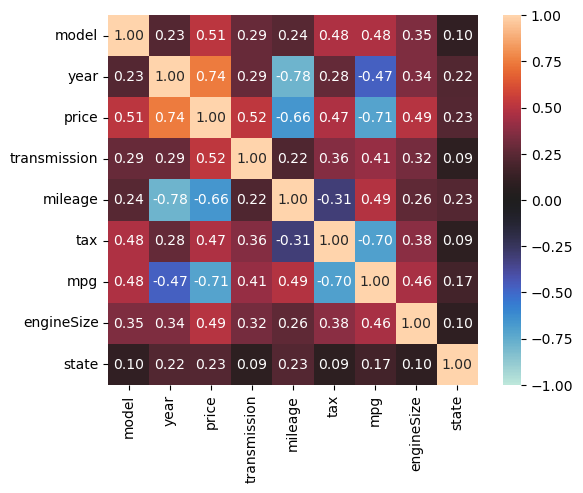

In [29]:
#!pip install python
from dython.nominal import associations
ax = associations(data_train_no_outliers)


From the above we can gain a few heatmap of correlation values we can gain multiple insights:
- `Year` has a moderate strong correlation with `price` (0.75) , the year here is ambiguous
- - if it refers to the year the car is produced, then it makes sense that the newer models will have higher price as they are usually more advanced
- - if it refers to the year the car was purchased, then it still makes sense that it will be more expensive as car prices always increase every year
- `Mileage` has a moderate negative correlation with `price` (-0.66) which means the more the car is used, the more its price is reduced
- `EngineSize` has a moderate positive correlation with `price` (0.49), where bigger engines mean more powerful and expensive cars
- `Tax` has a moderate positive correlation with `price` (0.51) 
- `fuelType` doesn't affect the `price` (0.04)
- `state` has a weak positive correlation with `price`
- `model` has a moderate positive correlation with `price`, where the model of the car greatly affects the price


It's important to note that correlation does not imply causation. For example, just because there is a weak correlation between the state of the car and its price, it does not necessarily mean that the state of the car directly causes the price to be higher or lower. There could be other factors at play that are influencing both variables.


Now we need to convert the categorial variables into numerical variables, as most most machine learning algorithms require numerical data as input.

We will use One-Hot Encoding in the [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html) package to encode `model`, `transmission`, `engineSize`, `state`



In [30]:
#!pip install category_encoders
import category_encoders as ce
# from sklearn.preprocessing import OneHotEncoder

encoder = ce.OneHotEncoder(cols=['model', 'transmission', 'engineSize', 'state'])

data_train_encoded = encoder.fit_transform(data_train_no_outliers)

In [31]:
display(data_train_encoded.head(30))

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,year,price,...,mpg,engineSize_1,engineSize_2,engineSize_3,engineSize_4,engineSize_5,engineSize_6,engineSize_7,state_1,state_2
0,1,0,0,0,0,0,0,0,2016,10999,...,76.3,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,2017,18400,...,49.6,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,2016,15945,...,61.4,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,2015,8490,...,68.9,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,2018,17297,...,64.2,1,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,2019,26900,...,39.8,0,0,1,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,2015,14940,...,58.9,0,1,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0,0,2019,38490,...,38.2,0,1,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,2019,18700,...,55.4,0,1,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,2019,36497,...,47.1,0,1,0,0,0,0,0,0,1


Since `state` can be 2 values only, then we will remove `state_2` column as 2 columns for a feature will cause [collinearity](https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168)

In [32]:
data_train_encoded.drop('state_1', axis=1, inplace=True)

In [33]:
# dataplot = sns.heatmap(data_train_encoded.corr(), cmap="YlGnBu", annot=True)

Now we need to apply feature scaling to make all values ranges from 0 to 1, here we will use **normalization** on `mileage`, `tax`, `mpg`, `price`, and `year`

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

# Define the columns to scale
cols_to_scale = ['mileage', 'tax', 'mpg', 'price', 'year']

# scale the columns
data_train_encoded[cols_to_scale] = scaler.fit_transform(data_train_encoded[cols_to_scale])

In [35]:
display(data_train_encoded)

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,year,price,...,tax,mpg,engineSize_1,engineSize_2,engineSize_3,engineSize_4,engineSize_5,engineSize_6,engineSize_7,state_2
0,1,0,0,0,0,0,0,0,0.7500,0.158274,...,0.000000,0.873371,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0.8125,0.288082,...,0.384615,0.376164,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0.7500,0.245023,...,0.384615,0.595903,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0.6875,0.114268,...,0.061538,0.735568,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0.8750,0.268736,...,0.446154,0.648045,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,0,0,0,0,0,0,0,1,0.7500,0.228414,...,0.092308,0.648045,0,1,0,0,0,0,0,0
7434,0,0,0,1,0,0,0,0,0.8125,0.342454,...,0.507692,0.391061,0,1,0,0,0,0,0,0
7435,1,0,0,0,0,0,0,0,0.5625,0.123178,...,0.384615,0.426443,0,0,0,1,0,0,0,0
7436,0,0,0,0,0,0,0,1,0.6875,0.210909,...,0.092308,0.648045,0,1,0,0,0,0,0,0


In [36]:
data_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377 entries, 0 to 7437
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model_1         7377 non-null   int64  
 1   model_2         7377 non-null   int64  
 2   model_3         7377 non-null   int64  
 3   model_4         7377 non-null   int64  
 4   model_5         7377 non-null   int64  
 5   model_6         7377 non-null   int64  
 6   model_7         7377 non-null   int64  
 7   model_8         7377 non-null   int64  
 8   year            7377 non-null   float64
 9   price           7377 non-null   float64
 10  transmission_1  7377 non-null   int64  
 11  transmission_2  7377 non-null   int64  
 12  transmission_3  7377 non-null   int64  
 13  mileage         7377 non-null   float64
 14  tax             7377 non-null   float64
 15  mpg             7377 non-null   float64
 16  engineSize_1    7377 non-null   int64  
 17  engineSize_2    7377 non-null   i

Now we will begin testing multiple regression models, then we 

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import xgboost as xg
from sklearn.linear_model import RANSACRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

Split data into features and target to test the models

In [38]:
# Split data into features and target
X = data_train_encoded.drop('price', axis=1)
y = data_train_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

implement RMSLE because the one in `sklearn` cause errors with negative values

In [39]:
def root_mean_squared_log_error_2(y_true, y_pred):

    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    return np.sqrt(np.mean(np.square(log_diff)))

Linear Regression

RMSLE = 0.035061268803611656, R2-Score = 0.8798277014226421


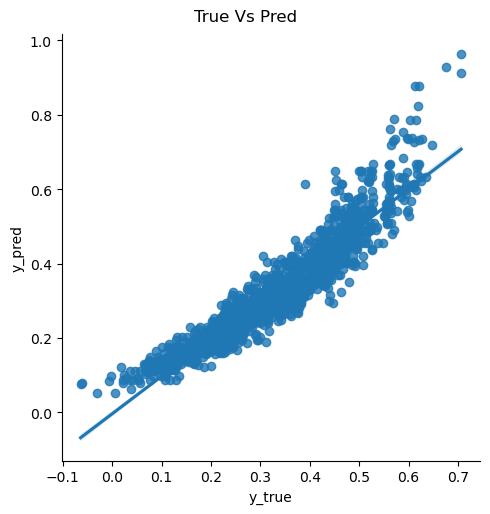

In [40]:
# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate model on test set
y_pred = lr.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print(mse, msle, r2)
print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Ridge

In [41]:
clf = Ridge()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

y_pred = lr.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')


RMSLE = 0.035061268803611656, R2-Score = 0.8798277014226421


Random Forest

RMSLE = 0.0239391210014851, R2-Score = 0.9433349448409042


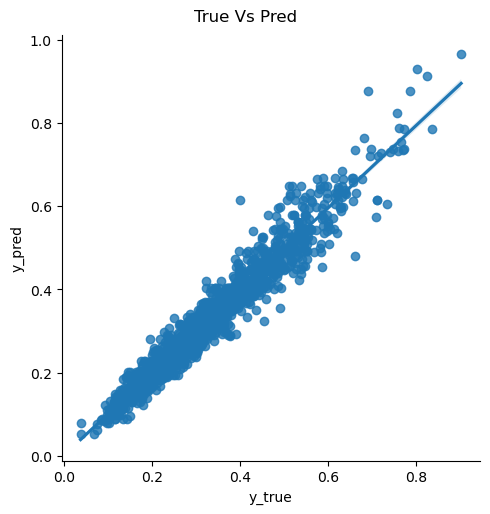

In [42]:
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)


y_pred = rfr.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)   
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Support Vector Regression

RMSLE = 0.037265122351834434, R2-Score = 0.8718267257281936


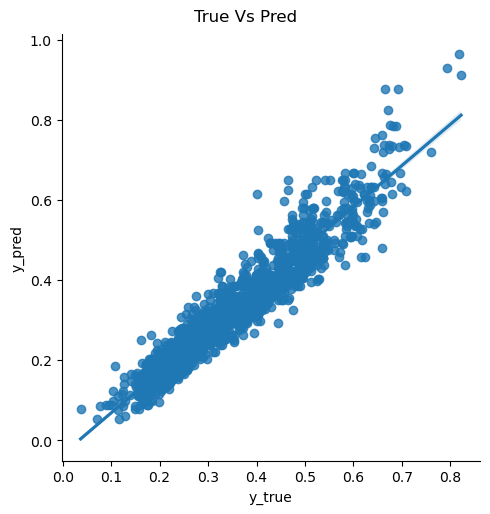

In [43]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

XGBoost Regresssion

RMSLE = 0.02576724938318365, R2-Score = 0.9361166902115189


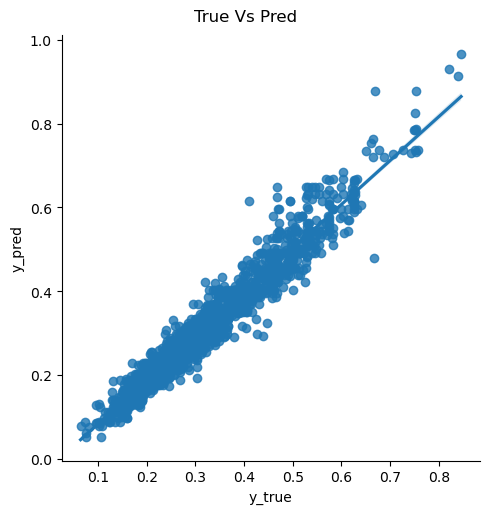

In [44]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Random sample consensus Regression

RMSLE = 0.035061407507837684, R2-Score = 0.8798351574530151


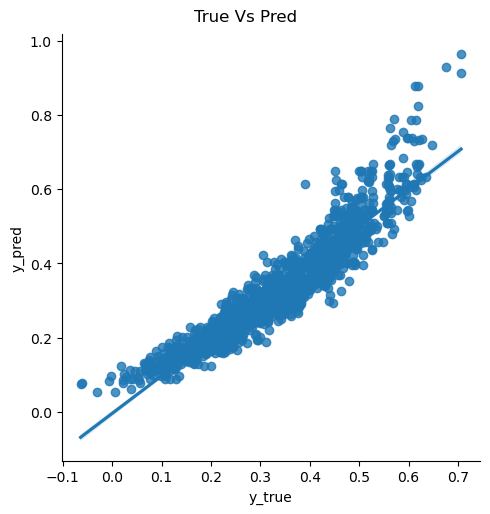

In [45]:
# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
		max_trials=4, 		# Number of Iterations
		min_samples=2, 		# Minimum size of the sample
		loss='absolute_error', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		)

ransac.fit(X_train, y_train)
y_pred = ransac.predict(X_test)

msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Gaussian processes regression

In [46]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
gp.fit(X_train, y_train)

y_pred, sigma = gp.predict(X_test, return_std=True)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')

RMSLE = 0.03473054169904261, R2-Score = 0.8798141821860964


RMSLE = 0.03473054169904261, R2-Score = 0.8798141821860964


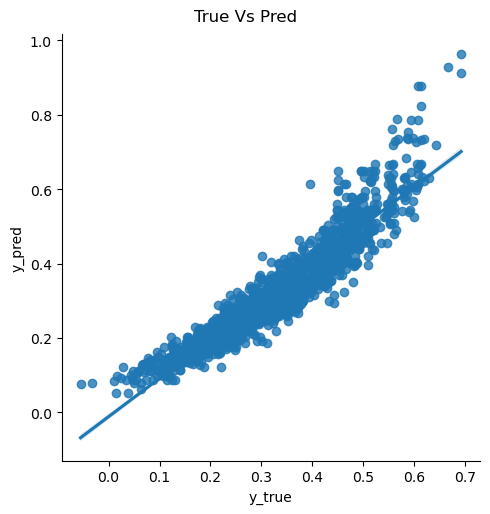

In [47]:
print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Decision Tree Regression

RMSLE = 0.030847911269490377, R2-Score = 0.905896454932411


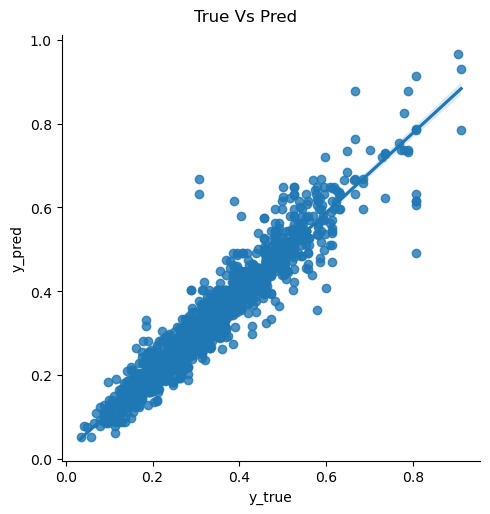

In [48]:
# Fit the decision tree model
dec_tree = DecisionTreeRegressor(max_depth=15)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Gradient Boosting

RMSLE = 0.02389042276599471, R2-Score = 0.9435712933715118


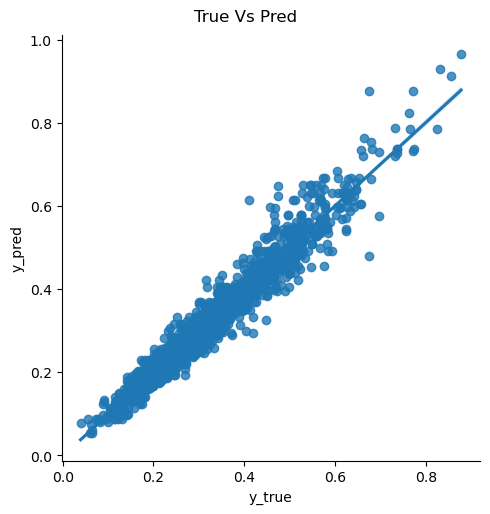

In [49]:
gradient_boost = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)


gradient_boost.fit(X_train, y_train)

y_pred = gradient_boost.predict(X_test)
msle = root_mean_squared_log_error_2(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSLE = {msle}, R2-Score = {r2}')
g = sns.lmplot(pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}), x='y_pred', y ='y_true')
g.fig.suptitle('True Vs Pred', y=1.02)
g.set_axis_labels('y_true', 'y_pred');
plt.show()

Now, we found out that the best model is ~~Random Forest~~ Gradient Boosting , so we will train the model with the actual training set before splitting it. 

Then we will apply the same preprocessing steps on the testing dataset and predict the price

In [50]:
# Split data into features and target
X_train = data_train_encoded.drop('price', axis=1)
y_train = data_train_encoded['price']

# train the model
# final_model = RandomForestRegressor(n_estimators = 500, random_state = 0)
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

We will apply what we did on the training to the testing

In [51]:
from copy import deepcopy

data_test = pd.read_csv('./test.csv')

# add a dummy price column
data_test['price'] = 0.0

# rename odd entries
#===================
data_test.loc[data_test['model'] == ' A1.', 'model'] = ' A1'
data_test.loc[data_test['model'] == ' A5.', 'model'] = ' A1'


# remove irrelevant variables
# ===========================
temp_id = data_test['ID']
data_test.drop("ID", axis=1, inplace=True)
data_test.drop("ownerName", axis=1, inplace=True)
data_test.drop("fuelType", axis=1, inplace=True)

# apply na filling operations on model, mileage, and state
# ========================================================

# get the median of the old mileage values
mileage_median = data_test['mileage'].median()

# fill the mileage of the new cars with 0.0
data_test.loc[data_test['state'] == 'New', 'mileage'] = data_test.loc[data_test['state'] == 'New', 'mileage'].fillna(0.0)

# fill the rest of the rows with the median
data_test['mileage'] = data_test['mileage'].fillna(mileage_median)

# get the mode of the old model values
model_mode = data_test['model'].mode()[0]

# fill the not assigned value with the mode in model
data_test['model'] = data_test['model'].fillna(model_mode)

# get the mode of the old state values
state_mode = data_test['state'].mode()[0]

# fill the state of the new cars with 0.0
data_test.loc[data_test['mileage'] == 0.0, 'state'] = data_test.loc[data_test['mileage'] == 0.0, 'state'].fillna('New')

# fill the rest of the rows with the mode
data_test['state'] = data_test['state'].fillna(state_mode)


# apply one hot encoding on categorial variables
# ==============================================
data_test_backup = deepcopy(data_test)

# apply it using the already tuned encoder
data_test = encoder.transform(data_test)

# drop the additional row as one row is enough for a binary category
data_test.drop('state_1', axis=1, inplace=True)

# normalize quantitaive variables
# =================================

# Define the columns to scale
cols_to_scale = ['mileage', 'tax', 'mpg', 'price', 'year']

# scale the columns with the already tuned scaler
data_test[cols_to_scale] = scaler.transform(data_test[cols_to_scale])



We will predict the `price` in the testing set

In [52]:
# drop the dummy price column
data_test.drop('price', axis=1, inplace=True)

# predict the price
y_pred = final_model.predict(data_test)

# return the price to rest of the rows
data_test['price'] = y_pred

# reverse the normalization of the quantitative variables
data_test[cols_to_scale] = scaler.inverse_transform(data_test[cols_to_scale])

data_test_backup['price'] = data_test['price']
data_test_backup['ID'] = temp_id

In [53]:
data_test_backup

,model,year,transmission,mileage,tax,mpg,engineSize,state,price,ID
0,A1,2016,Manual,29946.0,30,55.4,XSmall,Used,12363.032987,2
1,A1,2016,Automatic,32260.0,30,58.9,XSmall,Used,14020.317064,5
2,A4,2016,Manual,75185.0,20,70.6,XLarge,Used,11706.354700,7
3,A3,2014,Automatic,30516.0,30,56.5,XSmall,Used,12897.707880,17
4,Q5,2016,Automatic,37652.0,200,47.1,XLarge,Used,20884.674030,18
...,...,...,...,...,...,...,...,...,...,...
1854,A1,2010,Automatic,38000.0,125,53.3,XSmall,Used,8303.201223,9265
1855,A3,2016,Automatic,29494.0,125,49.6,XLarge,Used,17116.862375,9267
1856,A4,2017,Automatic,17900.0,145,50.4,XSmall,Used,19519.671173,9270
1857,A3,2016,Semi-Auto,52500.0,0,176.6,XSmall,Used,12311.904673,9285


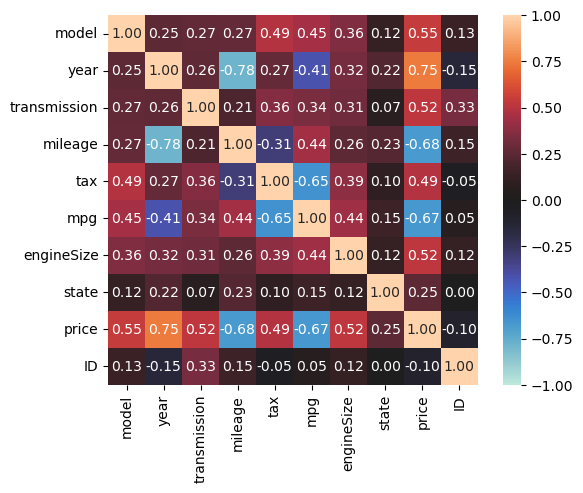

In [54]:
ax = associations(data_test_backup)

Save `ID` and `price` to an external file

In [55]:
output_df = data_test_backup[['ID', 'price']]
output_df.to_csv('Submission.txt', index=False)